<a href="https://colab.research.google.com/github/Anniegard/-/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%82%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/упражнения/Анализ_трафика.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory" target="_blank"></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D1%83%D0%BF%D1%80%D0%B0%D0%B6%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F/data/syn_scan_24112020.csv")
df.head()

,time,source,destination,protocol,length,tcp_retransmission,srcport,dstport,flags,seq_ack,win,len,mss,10
0,0.000000,172.16.0.8,64.13.134.52,TCP,58,False,36050,443,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
1,0.001539,172.16.0.8,64.13.134.52,TCP,58,False,36050,143,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
2,0.001597,172.16.0.8,64.13.134.52,TCP,58,False,36050,3306,[SYN],Seq=0,Win=2048,Len=0,MSS=1460,NaN
3,0.001650,172.16.0.8,64.13.134.52,TCP,58,False,36050,199,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
4,0.001703,172.16.0.8,64.13.134.52,TCP,58,False,36050,111,[SYN],Seq=0,Win=1024,Len=0,MSS=1460,NaN


In [ ]:
df["time"] = pd.to_datetime(df["time"])
df.set_index(df["time"])

,time,source,destination,protocol,length,tcp_retransmission,srcport,dstport,flags,seq_ack,win,len,mss,10
time,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,172.16.0.8,64.13.134.52,TCP,58,False,36050,443,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,172.16.0.8,64.13.134.52,TCP,58,False,36050,143,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,172.16.0.8,64.13.134.52,TCP,58,False,36050,3306,[SYN],Seq=0,Win=2048,Len=0,MSS=1460,NaN
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,172.16.0.8,64.13.134.52,TCP,58,False,36050,199,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,172.16.0.8,64.13.134.52,TCP,58,False,36050,111,[SYN],Seq=0,Win=1024,Len=0,MSS=1460,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000009,64.13.134.52,172.16.0.8,TCP,60,True,80,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000000011,64.13.134.52,172.16.0.8,TCP,60,True,22,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
1970-01-01 00:00:00.000000021,1970-01-01 00:00:00.000000021,64.13.134.52,172.16.0.8,TCP,60,True,53,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN


In [ ]:
df.head()

,time,source,destination,protocol,length,tcp_retransmission,srcport,dstport,flags,seq_ack,win,len,mss,10
0,1970-01-01,172.16.0.8,64.13.134.52,TCP,58,False,36050,443,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
1,1970-01-01,172.16.0.8,64.13.134.52,TCP,58,False,36050,143,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
2,1970-01-01,172.16.0.8,64.13.134.52,TCP,58,False,36050,3306,[SYN],Seq=0,Win=2048,Len=0,MSS=1460,NaN
3,1970-01-01,172.16.0.8,64.13.134.52,TCP,58,False,36050,199,[SYN],Seq=0,Win=3072,Len=0,MSS=1460,NaN
4,1970-01-01,172.16.0.8,64.13.134.52,TCP,58,False,36050,111,[SYN],Seq=0,Win=1024,Len=0,MSS=1460,NaN


# Задание

1. Определите все уникальные протоколы, которые встречаются в сетевом трафике:

In [ ]:
df["protocol"].unique()

array(['TCP'], dtype=object)

2. Определите все уникальные сетевые порты, которые встречаются в сетевом трафике:

In [ ]:
df["srcport"].unique()

array([36050,    53,   113,    80, 36051,    22,    25, 31337, 36061,
          70])

In [ ]:
df["dstport"].unique()

array([  443,   143,  3306, ...,   512, 49157,  3261])

3. Определите количественное распределение сетевых портов в сетевом трафике (постройте график вида гистограмма):

In [ ]:
df['srcport'].value_counts()

36050    1000
36051     993
80          4
53          4
22          4
113         2
36061       1
31337       1
70          1
25          1
Name: srcport, dtype: int64

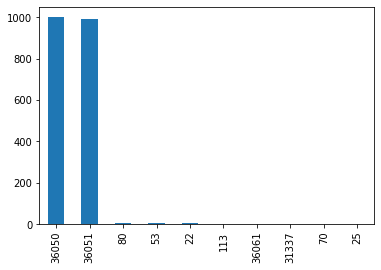

In [ ]:
srcports = df['srcport'].value_counts().head(10)
srcports.plot.bar()

In [ ]:
df['dstport'].value_counts()

36050    16
2047      2
4848      2
801       2
800       2
         ..
22        1
70        1
53        1
36061     1
31337     1
Name: dstport, Length: 1002, dtype: int64

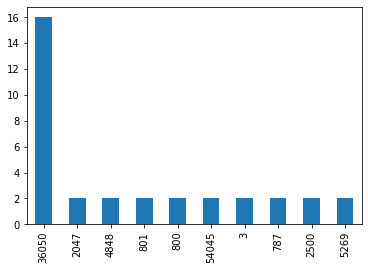

In [ ]:
dstports = df['dstport'].value_counts().head(10)
dstports.plot.bar()

4. Определите IP-адреса и сетевые порты, для которых установлен флаг tcp_retransmission:

In [ ]:
df[df.tcp_retransmission==True]

,time,source,destination,protocol,length,tcp_retransmission,srcport,dstport,flags,seq_ack,win,len,mss,10
528,1970-01-01 00:00:00.000000003,64.13.134.52,172.16.0.8,TCP,60,True,53,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
631,1970-01-01 00:00:00.000000003,64.13.134.52,172.16.0.8,TCP,60,True,80,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
1962,1970-01-01 00:00:00.000000005,64.13.134.52,172.16.0.8,TCP,60,True,22,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
2005,1970-01-01 00:00:00.000000009,64.13.134.52,172.16.0.8,TCP,60,True,53,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
2006,1970-01-01 00:00:00.000000009,64.13.134.52,172.16.0.8,TCP,60,True,80,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
2007,1970-01-01 00:00:00.000000011,64.13.134.52,172.16.0.8,TCP,60,True,22,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
2008,1970-01-01 00:00:00.000000021,64.13.134.52,172.16.0.8,TCP,60,True,53,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
2009,1970-01-01 00:00:00.000000021,64.13.134.52,172.16.0.8,TCP,60,True,80,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN
2010,1970-01-01 00:00:00.000000023,64.13.134.52,172.16.0.8,TCP,60,True,22,36050,"[SYN,ACK]",Seq=0Ack=1,Win=5840,Len=0,MSS=1380,NaN


5. Определите все уникальные IP-адреса источника и назначения в сетевом  трафике:

In [ ]:
df["source"].unique()

array(['172.16.0.8', '64.13.134.52'], dtype=object)

In [ ]:
df["destination"].unique()

array(['64.13.134.52', '172.16.0.8'], dtype=object)